In [1]:
import pandas as pd

In [2]:
aisles=pd.read_csv('../input/market-basket-analysis/aisles.csv')
departments=pd.read_csv('../input/market-basket-analysis/departments.csv')
orders=pd.read_csv('../input/market-basket-analysis/orders.csv')
products=pd.read_csv('../input/market-basket-analysis/products.csv')
sample_submission=pd.read_csv('../input/market-basket-analysis/sample_submission.csv')
order_products__prior=pd.read_csv('../input/market-basket-analysis/order_products__prior.csv')
order_products__train=pd.read_csv('../input/market-basket-analysis/order_products__train.csv')

In [3]:
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(-1)

In [4]:
#Merging  train order and prior orders first (to check)

Dataset_orders = pd.concat([order_products__prior, order_products__train]).sort_values(by=['order_id'])

In [5]:
#Concatenating with other DFs

Dataset_orders = pd.merge(left = Dataset_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
Dataset_orders = pd.merge(left = Dataset_orders, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
Dataset_orders = pd.merge(left = Dataset_orders, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = Dataset_orders, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

In [6]:
prior_train_orders.user_id.nunique()


206209

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


In [7]:
mostpopular_df = prior_train_orders.groupby("product_name")["reordered"].agg(
    ['count', 'sum']).rename(columns={'count': 'total', 'sum': 'reorders'})

mostpopular_df = mostpopular_df.sort_values(
    'total', ascending=False).reset_index()


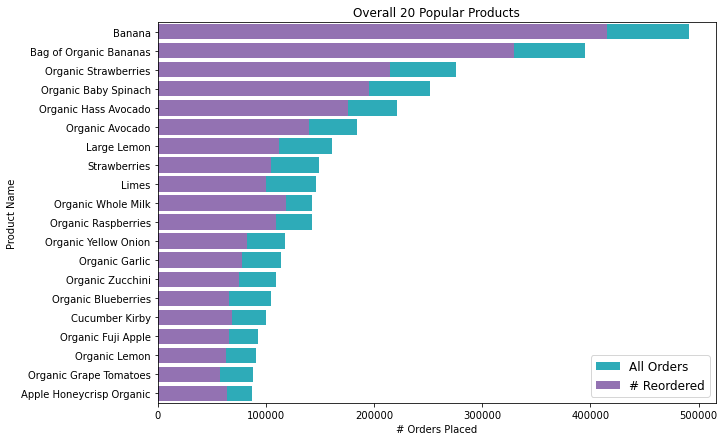

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(
    y=mostpopular_df.product_name[0:20], x=mostpopular_df.total[0:20], color=color[9], label="All Orders")
ax = sns.barplot(
    y=mostpopular_df.product_name[0:20], x=mostpopular_df.reorders[0:20], color=color[4], label="# Reordered")
ax.set_ylabel("Product Name")
ax.set_xlabel("# Orders Placed")
ax.set_title("Overall 20 Popular Products")
ax.legend(loc=4, prop={'size': 12})
plt.show()


/Users/shail/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


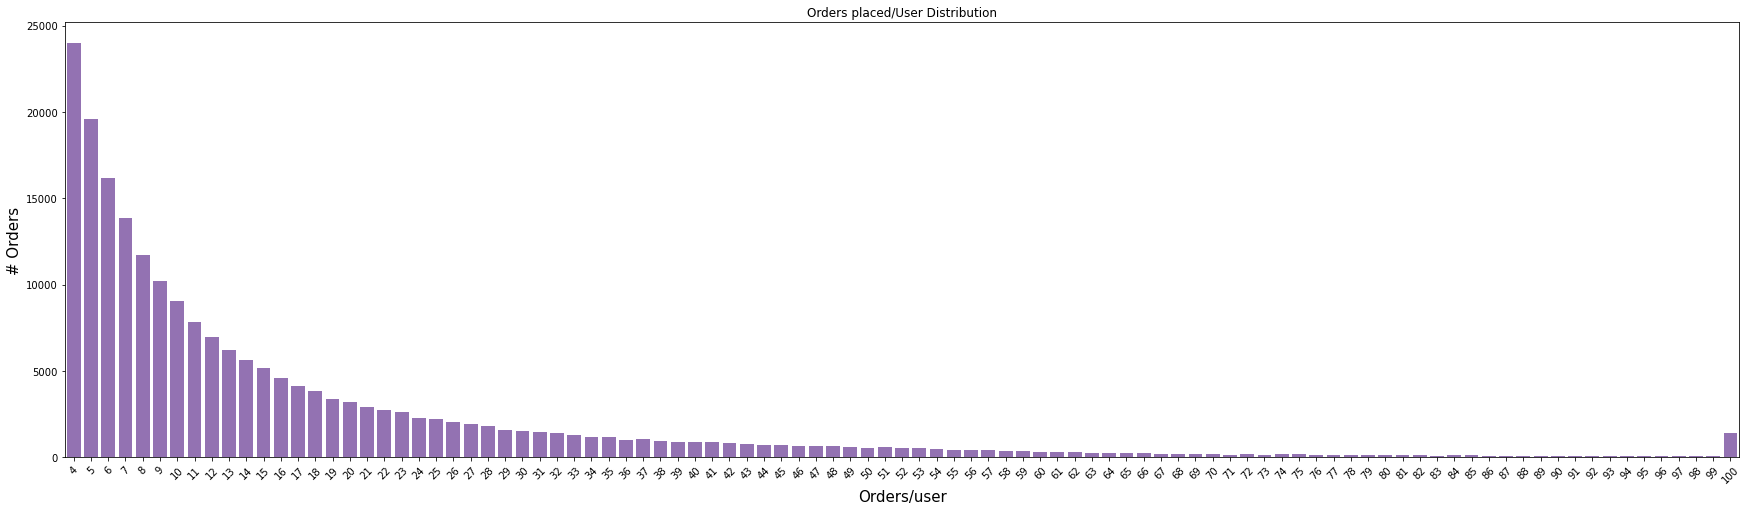

In [145]:
order_count = orders.groupby("user_id")["order_number"].aggregate(max).reset_index().order_number.value_counts()

plt.figure(figsize=(30, 8))
sns.barplot(order_count.index, order_count.values, color=color[4])
plt.ylabel("# Orders", fontsize=15)
plt.title("Orders placed/User Distribution")
plt.xticks(rotation="45")
plt.xlabel("Orders/user", fontsize=15)
plt.show()


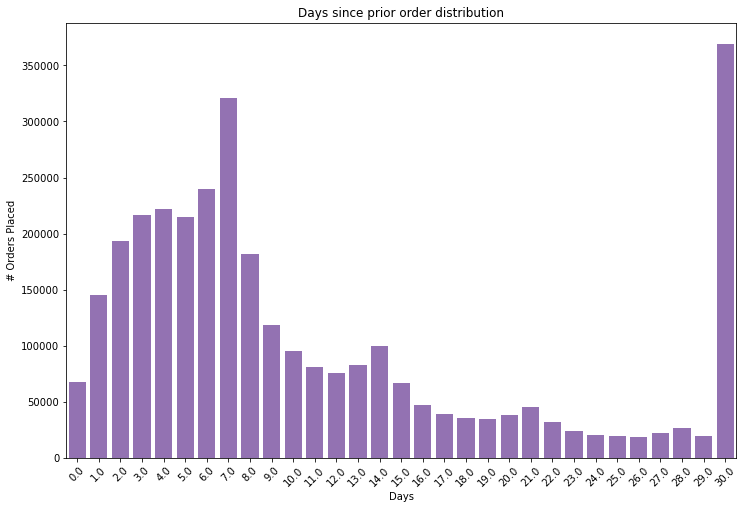

In [147]:
plt.figure(figsize=(12, 8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[4])
plt.ylabel("# Orders Placed")
plt.xlabel('Days')
plt.xticks(rotation="45")
plt.title("Days since prior order distribution")
plt.show()


In [9]:
crosstab = pd.crosstab(prior_train_orders.user_id, prior_train_orders.aisle)
crosstab.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [10]:
cross_df = crosstab.div(crosstab.sum(axis=1), axis=0)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.014286,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.028571
2,0.000000,0.013274,0.0,0.0,0.0,0.0,0.00885,0.0,0.0,0.0,...,0.013274,0.004425,0.004425,0.000000,0.0,0.0,0.0,0.008850,0.0,0.185841
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.021739,0.086957,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.065217


## PCA and K-Means

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
pcaDF = pca.fit_transform(cross_df)
pcaDF = pd.DataFrame(pcaDF)
pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.122382,0.028613,-0.047848,0.012766,-0.075254,-0.111798,-0.100816,0.088228,-0.063947,-0.002186,...,-0.001969,-0.013091,0.008560,-0.004560,0.014476,0.005894,-0.001285,-0.004740,-0.012067,-0.001018
1,-0.034421,0.111616,-0.064131,-0.109468,0.073279,-0.029578,-0.049192,-0.058602,-0.010486,-0.018532,...,-0.006596,-0.003583,0.001177,-0.008698,-0.005765,-0.002522,0.005009,-0.005740,-0.005658,-0.001557
2,0.063256,0.104112,0.000496,-0.014155,-0.047741,0.111108,-0.031840,0.013002,0.011887,0.004860,...,-0.004803,-0.012090,0.004019,0.001962,0.000224,-0.004755,-0.008938,-0.003822,0.000579,-0.002691
3,-0.094301,0.052755,0.001040,-0.005060,-0.071589,-0.017779,-0.025074,-0.039008,0.010015,-0.013979,...,0.015674,0.032807,0.031762,0.014143,0.000284,-0.001897,0.003066,0.000157,0.008077,0.027772
4,0.089432,-0.031068,-0.022805,-0.011826,0.042319,0.111464,-0.015766,0.100994,0.025117,-0.036488,...,0.022263,-0.004432,0.004990,-0.037704,-0.011249,-0.009406,0.002449,0.004346,-0.001141,-0.005728


In [12]:
ssd = []
for k in range(1,20):
    kMeans = KMeans(n_clusters=k).fit(pcaDF)
    ssd.append(kMeans.inertia_)


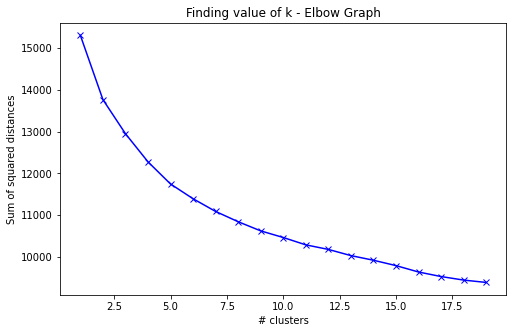

In [13]:
plt.subplots(figsize = (8, 5))
plt.plot(range(1,20), ssd, 'bx-')
plt.xlabel('# clusters')
plt.ylabel('Sum of squared distances')
plt.title('Finding value of k - Elbow Graph')
plt.show()

#### Selecting K = 15

In [14]:
kMeansCluster = KMeans(n_clusters=15,random_state=20).fit(pcaDF)
centers = kMeansCluster.cluster_centers_
predCenter = kMeansCluster.predict(pcaDF)

In [15]:
pca_plot_df = pcaDF.iloc[:, 0:2]
pca_plot_df.columns = ["PC_1", "PC_2"]
pca_plot_df['Cluster_no'] = predCenter
for i in range(0, 15):
    print("Cluster:", i+1,  "|| Total members: ", len(pca_plot_df[pca_plot_df.Cluster_no == i]))

Cluster: 1 || Total members:  4978
Cluster: 2 || Total members:  2287
Cluster: 3 || Total members:  16476
Cluster: 4 || Total members:  4304
Cluster: 5 || Total members:  44348
Cluster: 6 || Total members:  4655
Cluster: 7 || Total members:  9737
Cluster: 8 || Total members:  8570
Cluster: 9 || Total members:  23168
Cluster: 10 || Total members:  7079
Cluster: 11 || Total members:  40731
Cluster: 12 || Total members:  1532
Cluster: 13 || Total members:  2602
Cluster: 14 || Total members:  3854
Cluster: 15 || Total members:  31888


/var/folders/1s/wkv98bh91xv8dqvx9qz8_vdh0000gn/T/ipykernel_6110/1358567762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_plot_df['Cluster_no'] = predCenter


/Users/shail/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


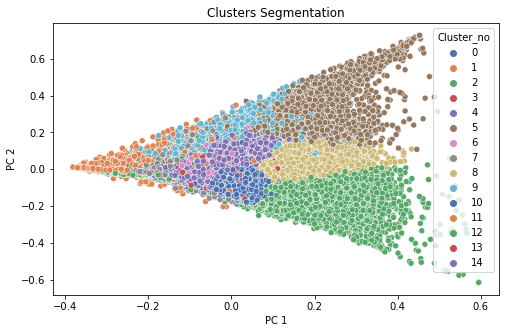

In [16]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = pca_plot_df, x = "PC_1", y = "PC_2", hue = "Cluster_no", palette="deep")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_title("Clusters Segmentation")
plt.show();

In [64]:
crosstab['cluster_no'] = predCenter

cluster_1 = pd.DataFrame(crosstab[crosstab.cluster_no == 0])
cluster_2 = crosstab[crosstab.cluster_no == 1]
cluster_3 = crosstab[crosstab.cluster_no == 2]
cluster_4 = crosstab[crosstab.cluster_no == 3]
cluster_5 = crosstab[crosstab.cluster_no == 4]
cluster_6 = crosstab[crosstab.cluster_no == 5]
cluster_7 = crosstab[crosstab.cluster_no == 6]
cluster_8 = crosstab[crosstab.cluster_no == 7]
cluster_9 = crosstab[crosstab.cluster_no == 8]
cluster_10 = crosstab[crosstab.cluster_no == 9]
cluster_11 = crosstab[crosstab.cluster_no == 10]
cluster_12 = crosstab[crosstab.cluster_no == 11]
cluster_13 = crosstab[crosstab.cluster_no == 12]
cluster_14 = crosstab[crosstab.cluster_no == 13]
cluster_15 = crosstab[crosstab.cluster_no == 14]

In [65]:
cluster_1.attrs['cluster_no'] = 'cluster_1'
cluster_2.attrs['cluster_no'] = 'cluster_2'
cluster_3.attrs['cluster_no'] = 'cluster_3'
cluster_4.attrs['cluster_no'] = 'cluster_4'
cluster_5.attrs['cluster_no'] = 'cluster_5'
cluster_6.attrs['cluster_no'] = 'cluster_6'
cluster_7.attrs['cluster_no'] = 'cluster_7'
cluster_8.attrs['cluster_no'] = 'cluster_8'
cluster_9.attrs['cluster_no'] = 'cluster_9'
cluster_10.attrs['cluster_no'] = 'cluster_10'
cluster_11.attrs['cluster_no'] = 'cluster_11'
cluster_12.attrs['cluster_no'] = 'cluster_12'
cluster_13.attrs['cluster_no'] = 'cluster_13'
cluster_14.attrs['cluster_no'] = 'cluster_14'
cluster_15.attrs['cluster_no'] = 'cluster_15'

In [66]:
cluster_1_top5 = cluster_1.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_2_top5 = cluster_2.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_3_top5 = cluster_3.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_4_top5 = cluster_4.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_5_top5 = cluster_5.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_6_top5 = cluster_6.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_7_top5 = cluster_7.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]

In [67]:
cluster_8_top5 = cluster_8.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_9_top5 = cluster_9.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_10_top5 = cluster_10.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_11_top5 = cluster_11.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_12_top5 = cluster_12.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_13_top5 = cluster_13.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_14_top5 = cluster_14.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]
cluster_15_top5 = cluster_15.drop('cluster_no',axis=1).mean().sort_values(ascending=False)[0:5]

In [73]:
clusters_all = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_7, cluster_8, cluster_9, cluster_10, cluster_11, cluster_12, cluster_13, cluster_14, cluster_15 ]

In [31]:
cluster_1.__setattr__("name=cluster", value="cluster_1")

In [33]:
cluster_1.__getattr__("name=cluster")

'cluster_1'

In [27]:
str(cluster_1_top5[:4].index.values)

"['frozen meals' 'fresh fruits' 'fresh vegetables' 'yogurt']"

In [68]:
def top_n_reccom_from_cluster(cluster_number, top_n):
    if cluster_number == "cluster_1":
        return  str(cluster_1_top5[:top_n].index.values)
    elif cluster_number == "cluster_2":
        return  str(cluster_2_top5[:top_n].index.values)
    elif cluster_number == "cluster_3":
        return  str(cluster_3_top5[:top_n].index.values)
    elif cluster_number == "cluster_4":
        return  str(cluster_4_top5[:top_n].index.values)
    elif cluster_number == "cluster_5":
        return  str(cluster_5_top5[:top_n].index.values)
    elif cluster_number == "cluster_6":
        return  str(cluster_6_top5[:top_n].index.values)
    elif cluster_number == "cluster_7":
        return  str(cluster_7_top5[:top_n].index.values)
    elif cluster_number == "cluster_8":
        return  str(cluster_8_top5[:top_n].index.values)
    elif cluster_number == "cluster_9":
        return  str(cluster_9_top5[:top_n].index.values)
    elif cluster_number == "cluster_10":
        return  str(cluster_10_top5[:top_n].index.values)
    elif cluster_number == "cluster_11":
        return  str(cluster_11_top5[:top_n].index.values)
    elif cluster_number == "cluster_12":
        return  str(cluster_12_top5[:top_n].index.values)
    elif cluster_number == "cluster_13":
        return  str(cluster_13_top5[:top_n].index.values)
    elif cluster_number == "cluster_14":
        return  str(cluster_14_top5[:top_n].index.values)
    elif cluster_number == "cluster_15":
        return  str(cluster_15_top5[:top_n].index.values)

In [75]:
def getRecommendations(user_id, top_n):
    for cluster in clusters_all:
        if len(cluster[cluster.index == user_id]) > 0:
            return top_n_reccom_from_cluster(cluster.attrs['cluster_no'], top_n)
        
    return "no preferences found!"

In [76]:
# recommendations for user-id 36855

print(getRecommendations(36855, 3))

['fresh fruits' 'packaged vegetables fruits' 'fresh vegetables']


In [77]:
# recommendations for user-id 6545

print(getRecommendations(6545, 3))

['fresh fruits' 'chips pretzels' 'packaged cheese']
